# World Happiness Report - Exploratory Data Analysis


## 1. Introduction
<br>
The World Happiness Report has been released by the UN Sustainable Development Solutions Network every year. The <b>World Happiness Report is a landmark survey</b> of the state of global happiness that ranks countries by how happy their citizens perceive themselves to be. The annual report ranks nations based on gross domestic product per person, healthy life expectancy and the opinions of residents. Surveys ask respondents to indicate on a 1-10 scale how much social support they feel they have if something goes wrong, their freedom to make their own life choices, their sense of how corrupt their society is and how generous they are. The happiness study ranks the countries of the world on the basis of questions from the Gallup World Poll. The results are then correlated with other factors, including GDP and social security.

<h4>Defining the columns</h4>

<br>
<li><b>Happiness_Rank</b> - Rank 1 means the happiest nation</li>

<li><b>year</b>- 7 years data from 2015 to 2021 </li>

<li><b>Happiness_Score</b> - means if you have bigger score you can have better possibilities in life, than someone whose have less score </li>

<li><b>GDP_per_Capita</b> - means Gross Domestic Product (GDP) per capita </li>

<li><b>Social_support</b> - means that person has a family, friends and other people, who can make a support for them in difficult life situation </li>

<li><b>Life_Expectancy</b> - years of healthy life which newborn can expect to have </li>

<li><b>Freedom</b> - means that people can choose job, family, friends, goverment and place to live on his own choice </li>

<li><b>Trust_in_Government</b> - means degree of corruption in the country and how much people trust in government </li>

<li><b>Generosity</b> - means the quality of kindness and generous </li>

<h3> Source of Data - <a href = "https://worldhappiness.report/)"> UN Sustainable Development Solutions Network </a> </h3>

## 2. Import required python libraries

In [ ]:
## Uncomment the following lines to install the necessary packages if not installed on your system to run the code
# !pip install numpy
# !pip install seaborn
# !pip install scikit-learn
# !pip install pandas==1.2.4
# !pip install geopandas==0.9.0
# !pip install plotly==5.1.0
# !pip install matplotlib

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import geopandas as gpd
import plotly
import plotly.express as px

## 3. Data transormation & data preprocessing

### Steps:

1. We have data for 7 years (2015 - 2021) with each year of data stored in a separate file. Also the format of the data changes every year. Hence the first step of our analysis would be to read different data files and format the column headers so as to obtain data consistency. Following this step we should be then able to concatenate all the datasets to create a single dataframe.

2. After combining the above datasets, we will apply data transformations to impute null values.

3. In this analysis, we want to create visualizations that will help us explain happiness in different countries of the world. One effective visualization is a chloropleth map, with happiness index of different countries visualized as a heatmap. For this reason, we will need a geospatial dataset containing polygon representation of every country. We use the <b>"naturalearth_lowres"</b> dataset provided by geopandas library for this purpose.

4. To create a master data file, we will <b>merge</b> the world happiness report dataset with the geopandas world polygons spatial data.

### 3a. Read world happiness dataset files

In [2]:
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")
df_2020 = pd.read_csv("2020.csv")
df_2021 = pd.read_csv("2021.csv")

### 3b. A quick view of the dataset helps us understand the inconsistencies in the dataset. We are going to be tackling each of these in the next steps:

    
    1. 2020 & 2021 datsets do not have columns representing "happiness rank" and "happiness score". Happiness Score is called "ladder score". Adding the Happiness Rank by sorting the Ladder Score column and getting the highest score as number one rank.
    

In [3]:
adding_index1 = range(1,len(df_2020)+1)
df_2020.sort_values('Ladder score')
df_2020['Happiness_Rank'] = adding_index1
adding_index2 = range(1,len(df_2021)+1)
df_2021.sort_values('Ladder score')
df_2021['Happiness_Rank'] = adding_index2

    2. Some datasets have "Region" column mapping each country to a specific region. We want to add this column across all years. Here we will store this mapping from 2015 data and later merge it with our consolidated dataset.

In [4]:
regions_df = df_2015[['Country','Region']]

    3. Inconsistent column names so making them consistent across years

In [5]:
## 2015 world happiness report data
df_2015 = df_2015[['Country','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity']]
df_2015 = df_2015.rename(columns = {'Economy (GDP per Capita)': 'GDP_per_Capita','Family': 'Social_support','Health (Life Expectancy)':'Life_Expectancy','Trust (Government Corruption)': 'Trust_in_Government','Happiness Rank':'Happiness_Rank','Happiness Score':'Happiness_Score'})
df_2015[['year']]= '2015'
# df_2015.head()

In [6]:
## 2016 world happiness report data
df_2016 = df_2016[['Country','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity']]
df_2016 = df_2016.rename(columns = {'Economy (GDP per Capita)': 'GDP_per_Capita','Family': 'Social_support','Health (Life Expectancy)':'Life_Expectancy','Trust (Government Corruption)': 'Trust_in_Government','Happiness Rank':'Happiness_Rank','Happiness Score':'Happiness_Score'})
df_2016[['year']]= '2016'
# df_2016.head()

In [7]:
## 2017 world happiness report data
df_2017 = df_2017[['Country','Happiness.Rank','Happiness.Score','Economy..GDP.per.Capita.','Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.','Generosity']]
df_2017 = df_2017.rename(columns = {'Economy..GDP.per.Capita.': 'GDP_per_Capita','Family': 'Social_support','Health..Life.Expectancy.':'Life_Expectancy','Trust..Government.Corruption.': 'Trust_in_Government','Happiness.Rank':'Happiness_Rank','Happiness.Score':'Happiness_Score'})
df_2017[['year']]= '2017'
# df_2017.head()

In [8]:
## 2018 world happiness report data
df_2018 = df_2018[['Country or region','Overall rank','Score','GDP per capita','Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption','Generosity']]
df_2018 = df_2018.rename(columns = {'GDP per capita': 'GDP_per_Capita','Social support': 'Social_support','Healthy life expectancy':'Life_Expectancy','Perceptions of corruption': 'Trust_in_Government','Overall rank':'Happiness_Rank','Score':'Happiness_Score','Freedom to make life choices':'Freedom','Country or region':'Country'})
df_2018[['year']]= '2018'
# df_2018.head()

In [9]:
## 2019 world happiness report data
df_2019 = df_2019[['Country or region','Overall rank','Score','GDP per capita','Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption','Generosity']]
df_2019 = df_2019.rename(columns = {'GDP per capita': 'GDP_per_Capita','Social support': 'Social_support','Healthy life expectancy':'Life_Expectancy','Perceptions of corruption': 'Trust_in_Government','Overall rank':'Happiness_Rank','Score':'Happiness_Score','Freedom to make life choices':'Freedom','Country or region':'Country'})
df_2019[['year']]= '2019'
# df_2019.head()

In [10]:
## 2020 world happiness report data
df_2020 = df_2020[['Country name','Happiness_Rank','Ladder score','Explained by: Log GDP per capita','Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Perceptions of corruption','Explained by: Generosity']]
df_2020 = df_2020.rename(columns = {'Explained by: Log GDP per capita': 'GDP_per_Capita','Explained by: Social support': 'Social_support','Explained by: Healthy life expectancy':'Life_Expectancy','Explained by: Perceptions of corruption': 'Trust_in_Government','Ladder score':'Happiness_Score','Explained by: Freedom to make life choices':'Freedom','Country name':'Country','Explained by: Generosity': 'Generosity'})
df_2020[['year']]= '2020'
# df_2020.head()

In [11]:
## 2021 world happiness report data
df_2021 = df_2021[['Country name','Happiness_Rank','Ladder score','Explained by: Log GDP per capita','Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Perceptions of corruption','Explained by: Generosity']]
df_2021 = df_2021.rename(columns = {'Explained by: Log GDP per capita': 'GDP_per_Capita','Explained by: Social support': 'Social_support','Explained by: Healthy life expectancy':'Life_Expectancy','Explained by: Perceptions of corruption': 'Trust_in_Government','Ladder score':'Happiness_Score','Explained by: Freedom to make life choices':'Freedom','Country name':'Country','Explained by: Generosity': 'Generosity'})
df_2021[['year']]= '2021'
# df_2021.head()

    4. Number of countries in report for each year is different. We want to create a unified set of countries for which we have data across 7 years to perform analysis. Hence we would not perform analysis on countries with missing/incomplete information.

In [12]:
df_2015 = df_2015.set_index(['Country','year'])
df_2016 = df_2016.set_index(['Country','year'])
df_2017 = df_2017.set_index(['Country','year'])
df_2018 = df_2018.set_index(['Country','year'])
df_2019 = df_2019.set_index(['Country','year'])
df_2020 = df_2020.set_index(['Country','year'])
df_2021 = df_2021.set_index(['Country','year'])

In [13]:
## Let us filter out the countries for which we have data available for all 5 years
tmp = pd.merge(df_2015.reset_index()[['Country','year']], df_2016.reset_index()[['Country','year']], on='Country', how='inner')
tmp = pd.merge(tmp, df_2017.reset_index()[['Country','year']], on='Country', how='inner')
tmp = pd.merge(tmp, df_2018.reset_index()[['Country','year']], on='Country', how='inner')
tmp = pd.merge(tmp, df_2019.reset_index()[['Country','year']], on='Country', how='inner')
tmp = pd.merge(tmp, df_2020.reset_index()[['Country','year']], on='Country', how='inner')
tmp = pd.merge(tmp, df_2021.reset_index()[['Country','year']], on='Country', how='inner')
country_list = tmp.Country.unique().tolist()

    Concatenate all datasets

In [14]:
happiness_index_df = df_2015.append(df_2016)
happiness_index_df = happiness_index_df.append(df_2017)
happiness_index_df = happiness_index_df.append(df_2018)
happiness_index_df = happiness_index_df.append(df_2019)
happiness_index_df = happiness_index_df.append(df_2020)
happiness_index_df = happiness_index_df.append(df_2021)

In [15]:
happiness_index_df = happiness_index_df.reset_index()
happiness_index_df = happiness_index_df.merge(regions_df,left_on='Country',right_on='Country')
happiness_index_df.head()

,Country,year,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_support,Life_Expectancy,Freedom,Trust_in_Government,Generosity,Region
0,Switzerland,2015,1,7.587,1.39651,1.349510,0.941430,0.665570,0.419780,0.296780,Western Europe
1,Switzerland,2016,2,7.509,1.52733,1.145240,0.863030,0.585570,0.412030,0.280830,Western Europe
2,Switzerland,2017,4,7.494,1.56498,1.516912,0.858131,0.620071,0.367007,0.290549,Western Europe
3,Switzerland,2018,5,7.487,1.42000,1.549000,0.927000,0.660000,0.357000,0.256000,Western Europe
4,Switzerland,2019,6,7.480,1.45200,1.526000,1.052000,0.572000,0.343000,0.263000,Western Europe


In [16]:
happiness_index_df = happiness_index_df[happiness_index_df.Country.isin(country_list)==True]

    5. There are null values in the "Trust_in_Government" column specifically for UAE. We will impute the missing values for this country with average "Trust_in_Government" value for UAE calculated using available data. 

In [17]:
tempp = happiness_index_df[(happiness_index_df['Country']=='United Arab Emirates') & (happiness_index_df['Trust_in_Government'].isna()==False)]
happiness_index_df.loc[(happiness_index_df['Trust_in_Government'].isna()==True),'Trust_in_Government'] = tempp['Trust_in_Government'].mean()

Let us now print the head of our compiled dataset to make sure all our preprocessing was successful.

In [18]:
happiness_index_df.head()

,Country,year,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_support,Life_Expectancy,Freedom,Trust_in_Government,Generosity,Region
0,Switzerland,2015,1,7.587,1.39651,1.349510,0.941430,0.665570,0.419780,0.296780,Western Europe
1,Switzerland,2016,2,7.509,1.52733,1.145240,0.863030,0.585570,0.412030,0.280830,Western Europe
2,Switzerland,2017,4,7.494,1.56498,1.516912,0.858131,0.620071,0.367007,0.290549,Western Europe
3,Switzerland,2018,5,7.487,1.42000,1.549000,0.927000,0.660000,0.357000,0.256000,Western Europe
4,Switzerland,2019,6,7.480,1.45200,1.526000,1.052000,0.572000,0.343000,0.263000,Western Europe


### 3c. Read world polygons spatial data

In [19]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_country_data_map = {'Bosnia and Herz.':'Bosnia and Herzegovina','Congo':'Congo (Brazzaville)','Dem. Rep. Congo':'Congo (Kinshasa)','Czechia':'Czech Republic','Dominican Rep.':'Dominican Republic',"Côte d'Ivoire":'Ivory Coast','Mauritania':'Mauritius','Palestine':'Palestinian Territories','United States of America':'United States'}
world['name'] = world['name'].apply(lambda x: world_country_data_map[x] if x in world_country_data_map else x)

## 4. Research questions

Research Questions to Investigate

We want to analyze the dataset to answer the following <b>key questions:</b>

<b>1. What countries/regions rank the highest in overall happiness score and across each of the six factors contributing to happiness?</b>

In doing so we will understand if the world's richest countries are also the world's happiest countries. We will also be able to dive deeper and understand countries that have the most/least freedom of choice as well as corruption. 

<b>Importance: </b>
Happiness is increasingly considered an important and useful way to guide public policy and measure its effectiveness. The report incorporates analysis by experts in economics, neuroscience and statistics, and shows how measurements of well-being can be used to evaluate a country’s progress. Our first question helps us understand which countries have been successful with their policy implementations and are world-leaders across dimensions. Simultaneously, we also understand which countries need to put more efforts and across which dimension

<b>2. What makes us happy?</b> This is an important question and we will use the data to frame an answer to this age-old question.

We want to understand the variations in the happiness score and each of the 6 considered features across time. We have 5 years of data, and we want to understand how world happiness has changed across time. With more research in healthcare, it makes sense that the life expectancy across the world should increase over the years. Does data support this hypothesis?

In this section, we plan to handpick some of the contrasting world economies and view their performance changes across happiness scores and other 6 features over the years. We want to find interesting patterns and trends in the temporal data for different countries which can challenge our known facts about the world.

<b>Importance: </b>
It is important to understand how happiness, GDP, life expectancy, trust in government, etc have changed in different countries across time. This gives us an insight into the global progress we are making as well as dive deep into the issues faced by different countries. It also helps us understand if certain policies implemented in that time frame had a positive/negative effect on any metric.


<b>3. Lastly, there is <a href="https://en.wikipedia.org/wiki/World_Happiness_Report#Criticism">criticism </a> of the World Happiness Report that the 6 features considered in formulating the happiness index are not created equally and is biased towards GDP of the countries. I want to analyze the data to prove/disprove this hypothesis.</b>

<b>Importance: </b>
Our last question is important in order to provide a caveat or footnote to the insights we have drawn from this analysis. If the happiness index has over emphasized on certain metrics over others, then we need to be careful before we make wrong assumptions about the state of the world.

### Analysis Questions
1. Which countries/regions rank the highest in overall happiness score and across each of the six factors contributing to happiness
2. Plotting World Happiness Score across countries - World Heatmap
3. Checking the highest to lowest happy regions
4. Understanding the top/bottom 10 nations - based on happiness score
5. GDP per Capita wise - Top/bottom nations and their average
6. Countries with the best healthcare system and health infrastructure
7. Corruption : Countries with highest & lowest trust in its Government
8. Pearson and Spearman correlation between the factors affecting the happiness of countries
9. Finding the trends between Happiness score & other features/factors
10. Based on available data checking the change in happiness metrics over the years
11. Insights comparing countries - Analysis of following countries across 6 features
    - United States
    - India
    - Russia
    - Italy
    - Iraq
    - Rwanda

## 5. Analysis

### 5.1. Q - What countries/regions rank the highest in overall happiness score and across each of the six factors contributing to happiness?

In [20]:
## Calculate mean feature scores by country across the 7 years

mean_index_df = happiness_index_df.groupby(['Country'])[['Happiness_Score', 'GDP_per_Capita','Social_support','Life_Expectancy','Freedom','Trust_in_Government','Generosity']].mean().reset_index()

#### 5.1.1 Plotting World Happiness Score chloropleth map

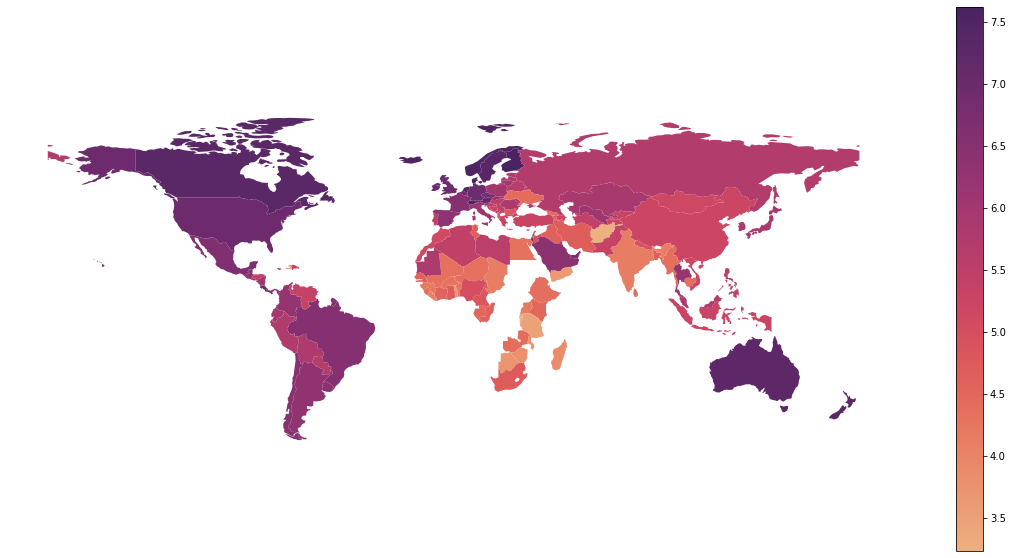

In [21]:
tmp = pd.merge(mean_index_df[['Country','Happiness_Score']], world, left_on='Country', right_on='name', how='left')
ax = gpd.GeoDataFrame(tmp).dropna().plot(column='Happiness_Score', cmap ='flare', figsize=(20,10), k=3, legend = True);
ax.set_axis_off()

In [22]:
## Aggregate data to region level
region_mean = pd.merge(mean_index_df, regions_df, on=['Country'])
region_mean = region_mean.groupby(['Region'])[['Happiness_Score', 'GDP_per_Capita','Social_support','Life_Expectancy','Freedom','Trust_in_Government','Generosity']].mean().reset_index()
region_mean[['Region','Happiness_Score']].sort_values(['Happiness_Score'], ascending=False)

,Region,Happiness_Score
0,Australia and New Zealand,7.280600
5,North America,7.140907
9,Western Europe,6.842558
3,Latin America and Caribbean,5.984976
2,Eastern Asia,5.550761
1,Central and Eastern Europe,5.523873
6,Southeastern Asia,5.406763
4,Middle East and Northern Africa,5.332325
7,Southern Asia,4.445821
8,Sub-Saharan Africa,4.272829


This gives us a clear picture of the happiness distribution across the world:

North America, Scandinavia and Australias lead the world in happiness score, whereas Africa & Asia are least happy.

#### 5.1.2 Understanding the top / bottom countries across happiness factors

In [23]:
## Top 10 countries by happiness score over the 7 years
mean_index_df[['Country', 'Happiness_Score']].sort_values(['Happiness_Score'], ascending=False).head(10)

,Country,Happiness_Score
39,Finland,7.619957
32,Denmark,7.570800
117,Switzerland,7.526843
51,Iceland,7.516214
93,Norway,7.512143
88,Netherlands,7.419414
116,Sweden,7.330357
89,New Zealand,7.305943
22,Canada,7.298300
5,Australia,7.255257


In [24]:
## Bottom 10 countries by happiness score over the 7 years
mean_index_df[['Country', 'Happiness_Score']].sort_values(['Happiness_Score'], ascending=True).head(10)

,Country,Happiness_Score
0,Afghanistan,3.236271
19,Burundi,3.277900
104,Rwanda,3.417186
119,Tanzania,3.489886
134,Yemen,3.616343
121,Togo,3.716457
15,Botswana,3.727986
136,Zimbabwe,3.782457
75,Malawi,3.793286
48,Haiti,3.809114


As expected, <b>Scandinavian countries such as Finland, Denmark, Switzerland</b> have the most 'happy' citizens in the world based on the data, whereas <b>Afghanistan, Burundi, Rwanda and other countries from Africa </b> rank very low on the happiness index.

There is definitely a pattern emerging as we can see propsperous nations at the top of the list and poor countries being at the bottom. To verify this hypothesis, we will use the "GDP per capita" variable which represents the strength of economy of every country. Higher the Gross Domestic Product (GDP) per person, higher the affluence of the country.

In [25]:
## Top 10 countries by GDP over the 7 years
top_10_happy_countries_gdp = mean_index_df[mean_index_df.Country.isin(mean_index_df[['Country', 'Happiness_Score']].sort_values(['Happiness_Score'], ascending=False)['Country'][:10])][['Country', 'GDP_per_Capita']]
print(top_10_happy_countries_gdp)
print("\nAverage GDP per capita score of top 10 happy countries in world: %.2f" % top_10_happy_countries_gdp['GDP_per_Capita'].mean())

         Country  GDP_per_Capita
5      Australia        1.391117
22        Canada        1.384185
32       Denmark        1.401799
39       Finland        1.359427
51       Iceland        1.391588
88   Netherlands        1.413573
89   New Zealand        1.318552
93        Norway        1.509159
116       Sweden        1.402877
117  Switzerland        1.473942

Average GDP per capita score of top 10 happy countries in world: 1.40


In [26]:
## Bottom 10 countries by GDP over the 7 years
bottom_10_happy_countries_gdp = mean_index_df[mean_index_df.Country.isin(mean_index_df[['Country', 'Happiness_Score']].sort_values(['Happiness_Score'], ascending=True)['Country'][:10])][['Country', 'GDP_per_Capita']]
print(bottom_10_happy_countries_gdp)
print("\nAverage GDP per capita score of bottom 10 happy countries in world: %.2f" % bottom_10_happy_countries_gdp['GDP_per_Capita'].mean())

         Country  GDP_per_Capita
0    Afghanistan        0.350896
15      Botswana        1.052065
19       Burundi        0.044605
48         Haiti        0.313292
75        Malawi        0.143301
104       Rwanda        0.331076
119     Tanzania        0.441293
121         Togo        0.264496
134        Yemen        0.452609
136     Zimbabwe        0.371832

Average GDP per capita score of bottom 10 happy countries in world: 0.38


This definitely verifies the hypothesis that the <b>most happy countries in the world are much more affluent (Average GDP score = 1.4) than the bottom happy countries (Average GDP score = 0.38) in the world.</b> 

#### 5.1.3 Countries with the best healthcare system and health infrastructure

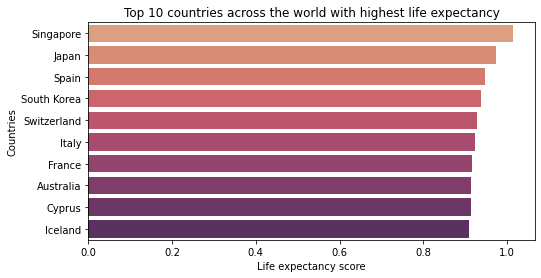

In [27]:
## Top 10 countries by Life expectancy over the 7 years
life_expectancy_top_10 = mean_index_df[['Country', 'Life_Expectancy']].sort_values(['Life_Expectancy'], ascending=False).head(10)
figure = plt.figure(figsize=(8,4))
ax = sns.barplot(y=life_expectancy_top_10.Country, x=life_expectancy_top_10.Life_Expectancy,palette="flare")
plt.xticks()
plt.xlabel('Life expectancy score')
plt.ylabel('Countries')
plt.title('Top 10 countries across the world with highest life expectancy')
plt.show()

Developed countries in South east Asia such as Singapore, Japan, South Korea and Europesan countries such as Spain, Italy, Switzerland have excellent healthcare infrastucture and research facilities which lead to higher life expectancy of their citizens.

#### 5.1.4 Corruption : Countries with highest & lowest trust in its Government 

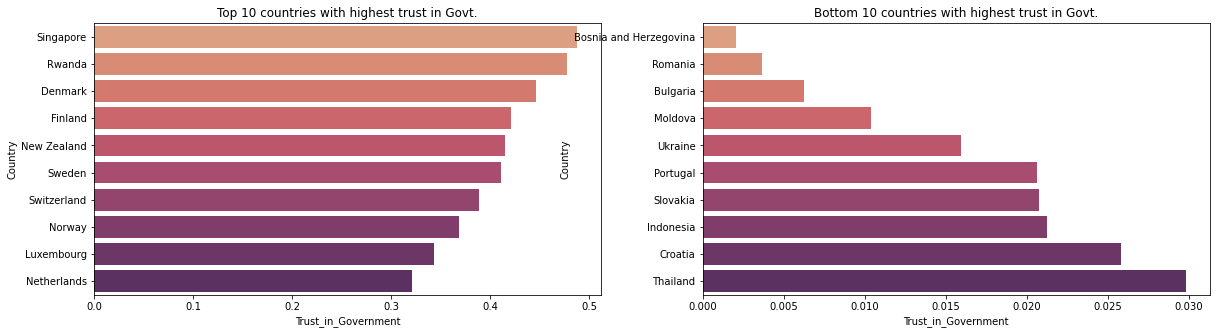

In [28]:
## Top 10 countries by Trust_in_Government over the 7 years
trust_top_10_df = mean_index_df[['Country', 'Trust_in_Government']].sort_values(['Trust_in_Government'], ascending=False).head(10)
trust_bottom_10_df = mean_index_df[['Country', 'Trust_in_Government']].sort_values(['Trust_in_Government'], ascending=True).head(10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.barplot(y=trust_top_10_df.Country, x=trust_top_10_df.Trust_in_Government,palette="flare", ax=axes[0])
sns.barplot(y=trust_bottom_10_df.Country, x=trust_bottom_10_df.Trust_in_Government,palette="flare", ax=axes[1])
axes[0].set_title('Top 10 countries with highest trust in Govt.')
axes[1].set_title('Bottom 10 countries with highest trust in Govt.')
plt.show()

Based on the data, citizens of Singapore and other Scandinavian countries have highest trust in their Government which implies lower levels of corruption in these countries. Whereas citizens of countries located around Russia such as Bosnia & Herzegovina, Bulgaria & Ukraine have lowest trust in Govt.

<b> What I found interesting is country of Rwanda ranking second in Government trust, despite being low on happiness index and GDP scale.</b> I thought this was an anomaly in the data, until I researched more and found this <a href="https://theconversation.com/lessons-from-rwanda-on-how-trust-can-help-repair-a-broken-health-system-124183"> article </a>
    
This article published in 2019 gives a positive account of 15 years of progress made by Rwanda in repairing a broken healtcare system and reducing death of children younger than 5 yrs of age; where "Trust" was their biggest tool. Building trust in citizens helps create stable government which leads to effective implementation of policies. Kudos Rwanda!

### 5.2. What makes us "Happy"?

<h4>Diving deep into the factors affecting happiness of people</h4>

#### 5.2.1 Plotting Correlations

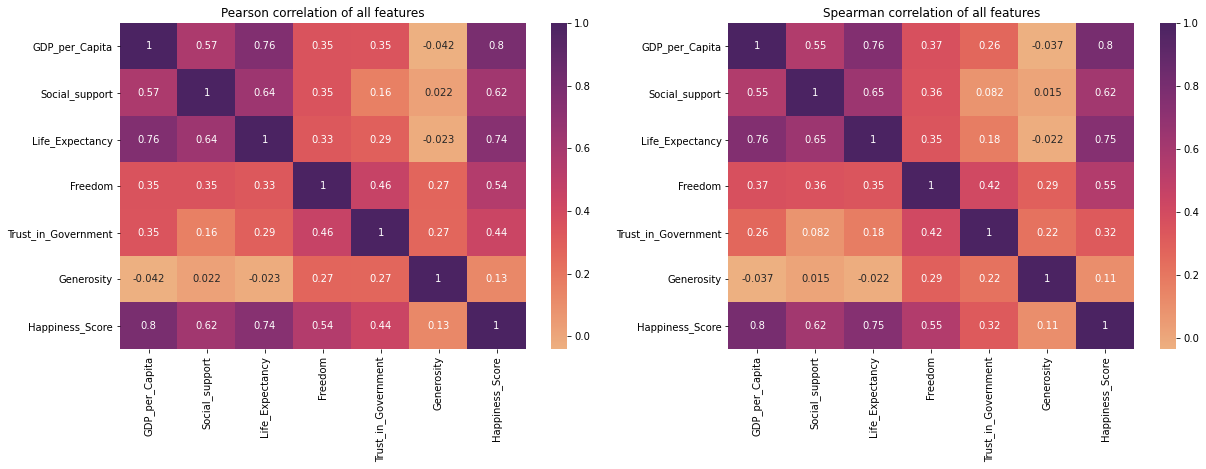

In [29]:
#loading the features dataframe
features_df = happiness_index_df[['GDP_per_Capita','Social_support','Life_Expectancy','Freedom','Trust_in_Government','Generosity', 'Happiness_Score']]

#ploting the heatmap for correlation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.heatmap(features_df.corr(method='pearson'), annot=True, cmap='flare', ax=axes[0]).set(title='Pearson correlation of all features')
sns.heatmap(features_df.corr(method='spearman'), annot=True, cmap='flare', ax=axes[1]).set(title='Spearman correlation of all features')
plt.show()

#### 5.2.2 Plotting scatter plots understanding the trends between Happiness score & other features

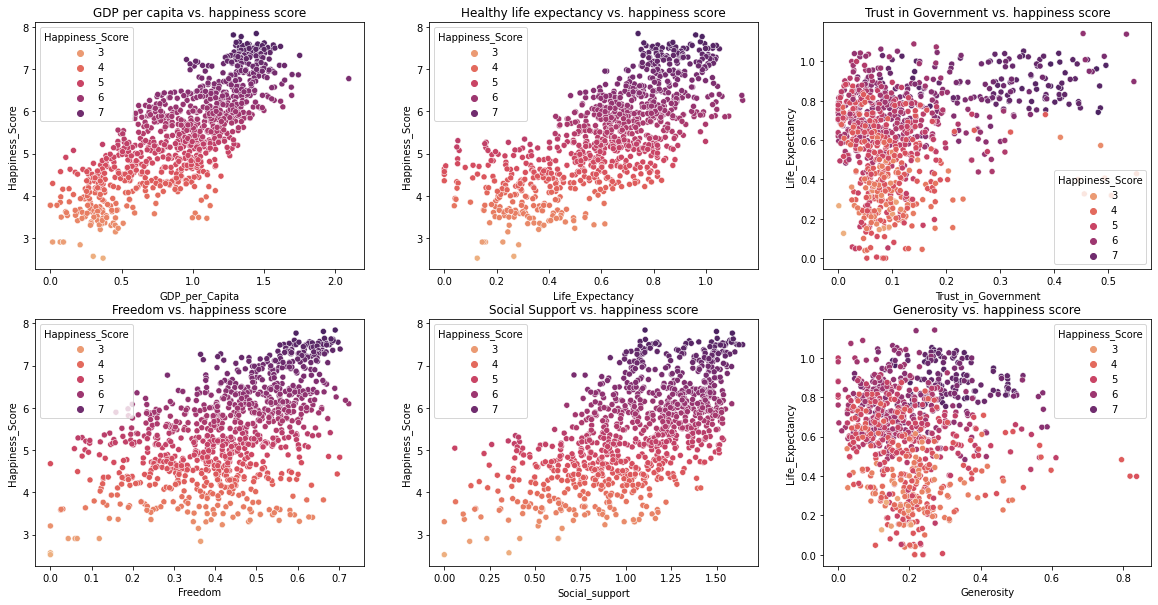

In [30]:
# Plotting scatter plots to visualize the trends and relation between happiness score and other features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
sns.scatterplot(ax=axes[0][0],x='GDP_per_Capita', y='Happiness_Score',palette= 'flare', data=happiness_index_df,hue='Happiness_Score').set(title='GDP per capita vs. happiness score')
sns.scatterplot(ax=axes[0][1], x='Life_Expectancy', y='Happiness_Score',palette= 'flare', data=happiness_index_df, hue='Happiness_Score').set(title='Healthy life expectancy vs. happiness score')
sns.scatterplot(ax=axes[0][2],x='Trust_in_Government', y='Life_Expectancy',palette= 'flare', data=happiness_index_df, hue='Happiness_Score').set(title='Trust in Government vs. happiness score')
sns.scatterplot(ax=axes[1][0],x='Freedom', y='Happiness_Score',palette= 'flare', data=happiness_index_df, hue='Happiness_Score').set(title='Freedom vs. happiness score')
sns.scatterplot(ax=axes[1][1],x='Social_support', y='Happiness_Score',palette= 'flare', data=happiness_index_df, hue='Happiness_Score').set(title='Social Support vs. happiness score')
sns.scatterplot(ax=axes[1][2],x='Generosity', y='Life_Expectancy',palette= 'flare', data=happiness_index_df, hue='Happiness_Score').set(title='Generosity vs. happiness score')
plt.show()

#### 5.2.3 Observations

<br>

    1. GDP, Social Support (Family & Friends) and Life Expectancy are strongly correlated with the Happiness score. 
    2. Freedom and correlates quite well with the Happiness score, however, Freedom correlates quite well with all data. 
    3. Government Trust still has a mediocre correlation with the Happiness score.
    4. If trust is high, the distribution is all over the place. It seems to be just a negative indicator on a threshold.
    5. It seems like the common criticism for "The World Happiness Report" is quite valid. A high focus on GDP and strongly correlated features such as social support and life expectancy.
    6. As common wisdom dictates - money makes you happy up to a certain threshold (about 70,000 in the US). However, having a good social network is important and family + friends tend to provide that. High life expectancy and health make you worry less about how you'll survive thus making you more happy.

### 5.3. Change in happiness metrics over time

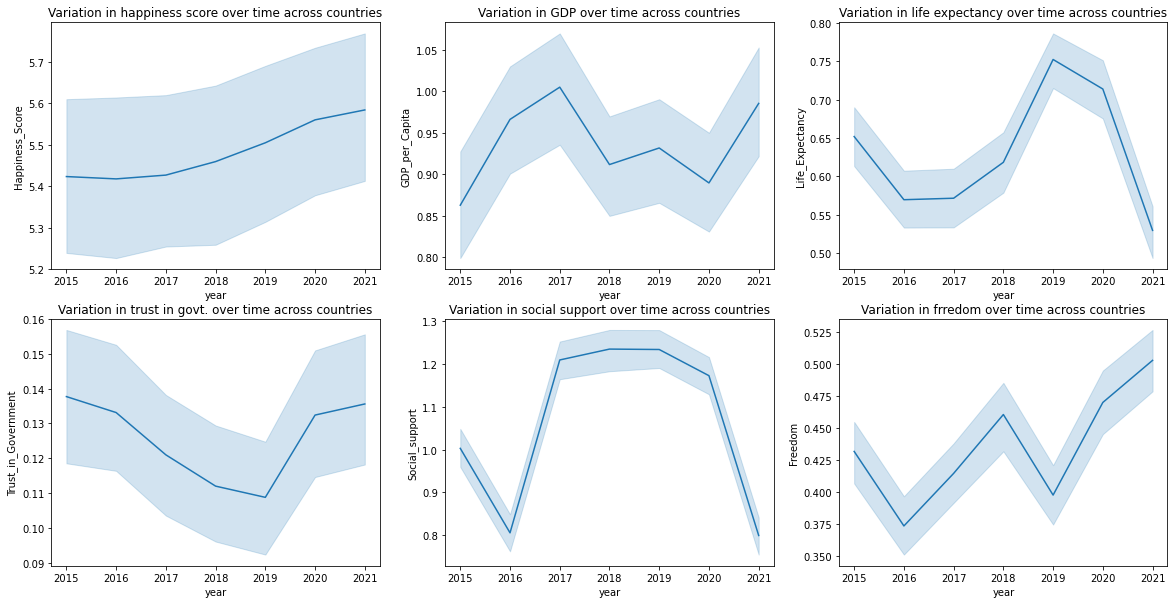

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
sns.lineplot(x='year', y='Happiness_Score', data=happiness_index_df, ax=axes[0][0]).set(title='Variation in happiness score over time across countries')
sns.lineplot(x='year', y='GDP_per_Capita',data=happiness_index_df, ax=axes[0][1]).set(title='Variation in GDP over time across countries')
sns.lineplot(x='year', y='Life_Expectancy',data=happiness_index_df, ax=axes[0][2]).set(title='Variation in life expectancy over time across countries')
sns.lineplot(x='year', y='Trust_in_Government',data=happiness_index_df, ax=axes[1][0]).set(title='Variation in trust in govt. over time across countries')
sns.lineplot(x='year', y='Social_support',data=happiness_index_df, ax=axes[1][1]).set(title='Variation in social support over time across countries')
sns.lineplot(x='year', y='Freedom',data=happiness_index_df, ax=axes[1][2]).set(title='Variation in frredom over time across countries')
plt.show()

<b>Observations:</b>

    1. On average worldwide, the happiness score has been rising over the years and the variance in happiness score across countries is very high (as can be seen by the thickness of the plot)
    
    2. The most interesting plot by far is that of "Average Life expectancy" which had been steadily rising until 2019 and we see a significant drop between 2019 to 2021. This clearly demostrates the effect of COVID-19 pandemic which has taken a serious toll on human life.
    
    3. All of us have been severely affected by the effects of the COVID-19 pandemic and many people lost their loved ones. This explains the drop in social support (family & friends) score  in 2021.
    
    4. Trust in Governments across the world has been on a steady decline since 2015 until 2019. This pattern can be explained by the numerous civil unrests across the world and rise of autocratic leadership in many countries. However, the trust has started growing since 2020 and could be attributed to effective government leadership in tackling the pandemic.

### 5.4 Insights comparing countries

In this section we select a few countries to compare & contrast across different metrics of happiness score & time. The countries I have chosen for this analysis are:
    
    - United States
    - India
    - Russia
    - Italy
    - Iraq
    - Rwanda
    
The idea of this analysis is to understand some interesting patterns observed across developed & developing countries that represent inherent traits of the country. I also wanted to understand if the data represents developed economies to be superior across all metrics when compared with developing nations and how the developing nations are making progress over the years. 

In [32]:
countries = happiness_index_df[(happiness_index_df['Country'].isin(['Russia','United States','Rwanda','India','Iraq','Italy']))] 

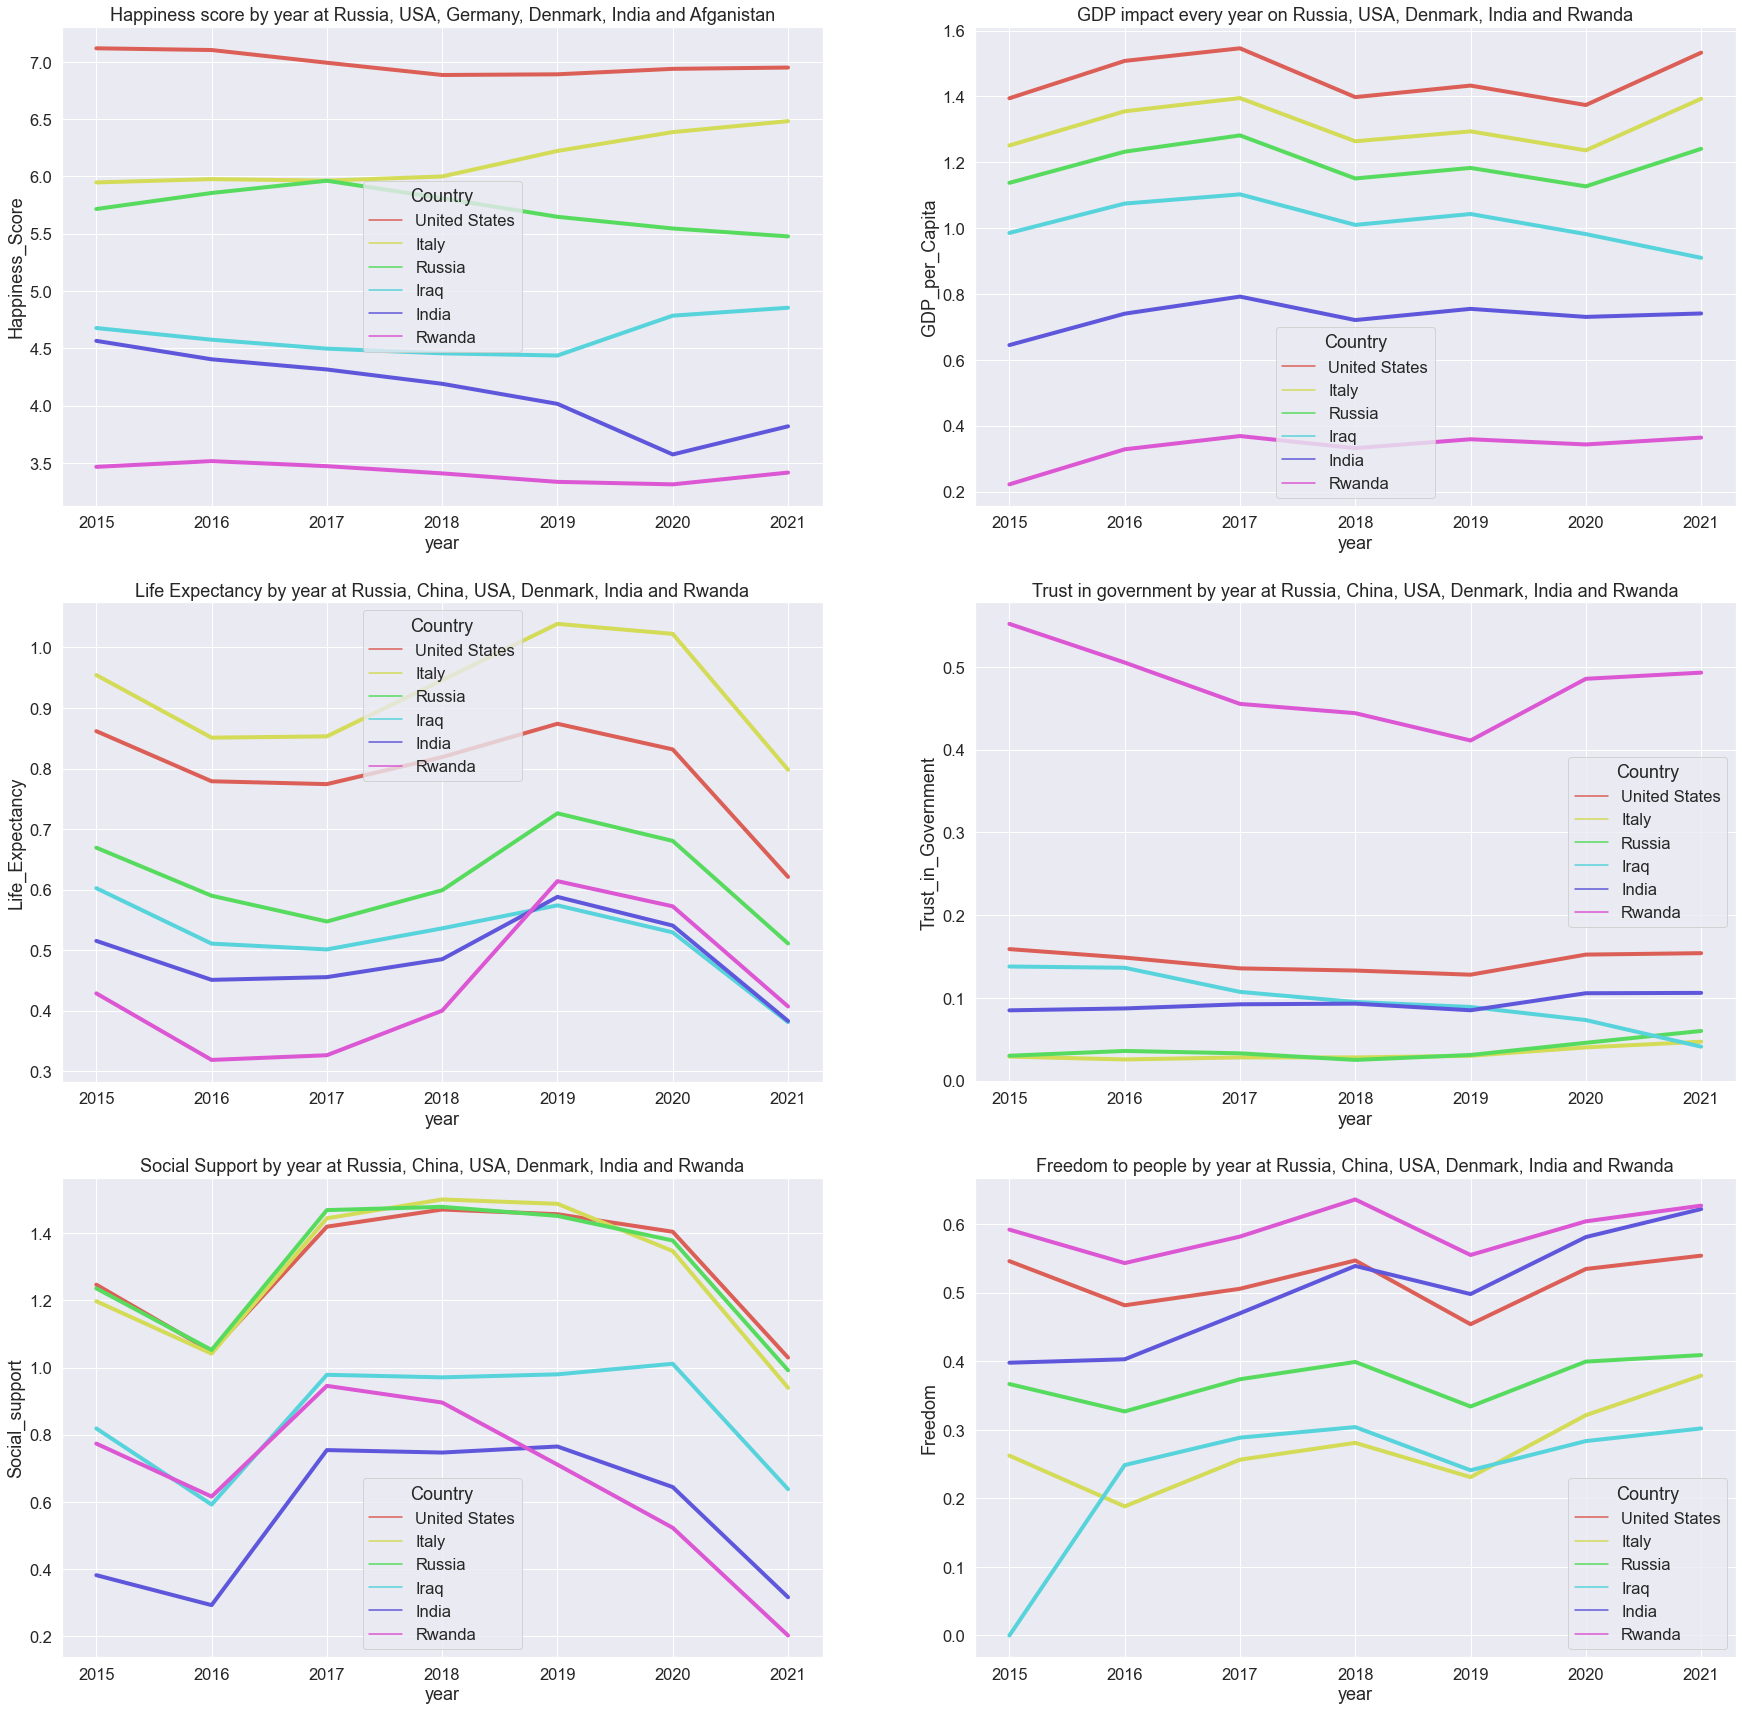

In [33]:
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30,30))
sns.lineplot(x='year', y='Happiness_Score', data=countries, hue='Country',linewidth=4,palette= 'hls', ax=axes[0][0]).set(title='Happiness score by year at Russia, USA, Germany, Denmark, India and Afganistan')
sns.lineplot(x='year', y='GDP_per_Capita', data=countries, hue='Country',linewidth=4,palette= 'hls', ax=axes[0][1]).set(title='GDP impact every year on Russia, USA, Denmark, India and Rwanda')
sns.lineplot(x='year', y='Life_Expectancy', data=countries, hue='Country',linewidth=4,palette= 'hls', ax=axes[1][0]).set(title='Life Expectancy by year at Russia, China, USA, Denmark, India and Rwanda')
sns.lineplot(x='year', y='Trust_in_Government', data=countries, hue='Country',linewidth=4,palette= 'hls', ax=axes[1][1]).set(title='Trust in government by year at Russia, China, USA, Denmark, India and Rwanda')
sns.lineplot(x='year', y='Social_support', data=countries, hue='Country',linewidth=4,palette= 'hls', ax=axes[2][0]).set(title='Social Support by year at Russia, China, USA, Denmark, India and Rwanda')
sns.lineplot(x='year', y='Freedom', data=countries, hue='Country',linewidth=4,palette= 'hls', ax=axes[2][1]).set(title='Freedom to people by year at Russia, China, USA, Denmark, India and Rwanda')
# sns.lineplot(x='year', y='Generosity', data=countries, hue='Country',linewidth=4,palette= 'hls', ax=axes[2][0]).set(title='Generosity by year at Russia, China, USA, Denmark, India and Rwanda')
plt.show()

<b> Observations: </b>

    1. United States: 
    
        a. It has been consistently leading happiness score & GDP across the years when compared with other countries in the list. 
        
        b. However, it ranks 2nd on Life expectancy behind Italy and "Trust in Government" and has fallen to 3rd in Freedom score since 2018. 
        
        c. This is interesting since United States has always been a symbol of free speech and freedom of choice and the dip in 2018 could represent the policies of the Government in power and the score has started to climb again since 2020 post elections 
    
    2. Rwanda
        
        a. Citizens of Rwanda have consistently displayed very high trust in its government as we have explained in our analysis earlier
        
        b. Rwanda has also topped the list in freedom of choice to people beating countries like Russia & United States.
        c. Despite the trust and freedom scores, Rwanda has been at the bottom on happiness and GDP score and has dropped on social support (family+friends) score since 2017.
    
    3. Russian citizens have consistently displayed low trust in Government and the happiness score has been steadily declining since 2017, which could be indicative of the authoritative Govt. policies.
    
    4. 2020 & 2021 have seen a drop in life expectancy scores across all countries explaining the effects of COVID-19 pandemic.
    
    5. Italy performs very well on all metrics except trust in government score and freedom to people, which reflects poorly on the Govt. in power.

# Conclusion

We have analysed the 'World Happiness Report' survey data of 7 years.

<b>1. What countries/regions rank the highest in overall happiness score and across each of the six factors contributing to happiness? </b>

Results are as expected, Scandinavia and Nordic countries such as Finland, Denmark, Switzerland have the most 'happy' citizens in the world based on the data, whereas Afghanistan, Burundi, Rwanda and other countries from Africa rank very low on the happiness index. The analyses verifies that the hypothesis is correct. Most happy countries in the world are much more affluent (Average GDP score = 1.4) than the bottom happy countries (Average GDP score = 0.38) in the world.

<b>2. What makes us happy? This is an important question and we will use the data to frame an answer to this age-old question.</b>

After analysing the data, we can confirm that each of the 6 factors contributes to the happiness of people. Economy, friends and family, good life style with better health care etc all factors leads to happiness and better happiness score. From the data, it can be confirmed that good financial condition can be a leading factor to happiness but up to an extent. After achieving the threshhold everyone needs freedom to enjoy and friends to celebrate with.

<b>3. Impact of Covid-19 on happiness of people.</b>

The data clearly states that "Average Life expectancy" which had been steadily rising until 2019, had a significant drop between 2019 to 2021. This clearly demostrates the effect of COVID-19 pandemic which has taken a serious toll on human life. This also impacted the normal life style and had a great impact on 'Trust in Government' factor.

<b>4. Lastly, to prove/disprove the biasness of data towards particular features like GDP of the countries.</b>

We verified the criticism of 'World Happiness Report' because happiness score is strongly correlated with GDP, Social Support (Family & Friends) and Life Expectancy. 